## Feature Scaling

[Feature Engineering for Machine Learning Course](https://www.trainindata.com/p/feature-engineering-for-machine-learning)

We discussed previously that the scale of the features is an important consideration when building machine learning models. Briefly:


### Feature magnitude matters because:

- The regression coefficients of linear models are directly influenced by the scale of the variable.
- Variables with bigger magnitude / larger value range dominate over those with smaller magnitude / value range
- Gradient descent converges faster when features are on similar scales
- Feature scaling helps decrease the time to find support vectors for SVMs
- Euclidean distances are sensitive to feature magnitude.
- Some algorithms, like PCA require the features to be centered at 0.


### The machine learning models affected by the feature scale are:

- Linear and Logistic Regression
- Neural Networks
- Support Vector Machines
- KNN
- K-means clustering
- Linear Discriminant Analysis (LDA)
- Principal Component Analysis (PCA)


### Feature Scaling

**Feature scaling** refers to the methods or techniques used to normalize the range of independent variables in our data, or in other words, the methods to set the feature value range within a similar scale. Feature scaling is generally the last step in the data preprocessing pipeline, performed **just before training the machine learning algorithms**.

There are several Feature Scaling techniques, which we will discuss throughout this section:

- Standardisation
- Mean normalisation
- Scaling to minimum and maximum values - MinMaxScaling
- Scaling to maximum value - MaxAbsScaling
- Scaling to quantiles and median - RobustScaling
- Normalization to vector unit length

In this notebook, we will discuss **MinMaxScaling**.

=================================================================

## Scaling to Minimum and Maximum values - MinMaxScaling

Minimum and maximum scaling squeezes the values between 0 and 1. It subtracts the minimum value from all the observations, and then divides it by the value range:

X_scaled = (X - X.min / (X.max - X.min)


The result of the above transformation is a distribution which values vary within the range of 0 to 1. But the mean is not centered at zero and the standard deviation varies across variables. The shape of a min-max scaled distribution will be similar to the original variable. This scaling technique is also sensitive to outliers.

In a nutshell, MinMaxScaling:

- the minimum and maximum values are 0 and 1.
- does not center the mean at 0
- variance varies across variables
- sensitive outliers

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# dataset for the demo
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# the scaler - for min-max scaling
from sklearn.preprocessing import MinMaxScaler

In [2]:
# load the California House price data from Scikit-learn

X, y = fetch_california_housing(return_X_y=True, as_frame=True)

In [3]:
# let's have a look at the main statistical parameters of the variables
# to get an idea of the feature magnitudes

X.describe().round(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00
mean,3.87,28.64,5.43,1.10,1425.48,3.07,35.63,-119.57
std,1.90,12.59,2.47,0.47,1132.46,10.39,2.14,2.00
min,0.50,1.00,0.85,0.33,3.00,0.69,32.54,-124.35
25%,2.56,18.00,4.44,1.01,787.00,2.43,33.93,-121.80
50%,3.53,29.00,5.23,1.05,1166.00,2.82,34.26,-118.49
75%,4.74,37.00,6.05,1.10,1725.00,3.28,37.71,-118.01
max,15.00,52.00,141.91,34.07,35682.00,1243.33,41.95,-114.31


The different variables present different value ranges, mean, max, min, standard deviations, etc. In other words, they show different magnitudes or scales. 

Note that **the minimum and maximum values are are quite different in the different variables**.

When performing min-max scaling on the data set, we need to first identify the minimum and maximum values of the variables. These parameters need to be learned from the train set, stored, and then used to scale test and future data. Thus, we will first divide the data set into train and test, as we have done throughout the course.

In [4]:
# let's separate the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0,
)

# size
X_train.shape, X_test.shape

((14448, 8), (6192, 8))

### MinMaxScaling

The MinMaxScaler from scikit-learn subtracts the minimum value and re-scales the the value range, rendering the variable values between 0 and 1. 

In [5]:
# set up the scaler
scaler = MinMaxScaler().set_output(transform="pandas")

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# the scaler stores the maximum values of the features, learned from train set

scaler.data_max_

array([ 1.50001000e+01,  5.20000000e+01,  1.32533333e+02,  3.40666667e+01,
        3.56820000e+04,  5.99714286e+02,  4.19500000e+01, -1.14310000e+02])

In [7]:
# tthe scaler stores the minimum values of the features, learned from train set

scaler.min_

array([-3.44753865e-02, -1.96078431e-02, -6.42548386e-03, -9.88142292e-03,
       -8.40830741e-05, -1.25216147e-03, -3.45802338e+00,  1.23854582e+01])

In [8]:
# the scaler also stores the value range (max -  min)

scaler.data_range_

array([1.45002000e+01, 5.10000000e+01, 1.31687179e+02, 3.37333333e+01,
       3.56790000e+04, 5.98964286e+02, 9.41000000e+00, 1.00400000e+01])

In [9]:
# let's check the stats of the scaled data:

X_train_scaled.describe().round(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,14448.00,14448.00,14448.00,14448.00,14448.00,14448.00,14448.00,14448.00
mean,0.23,0.54,0.03,0.02,0.04,0.00,0.33,0.48
std,0.13,0.25,0.02,0.01,0.03,0.01,0.23,0.20
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.14,0.33,0.03,0.02,0.02,0.00,0.15,0.25
50%,0.21,0.55,0.03,0.02,0.03,0.00,0.18,0.58
75%,0.29,0.71,0.04,0.02,0.05,0.00,0.55,0.63
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


As expected, the minimum and maximum values for all the variables are 0 and 1, respectively. The mean is not centered at zero, and the variance changes.

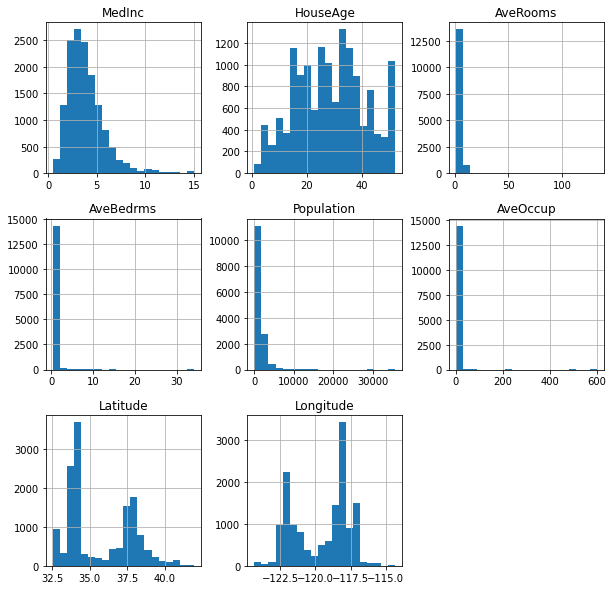

In [10]:
# Distribution before scaling:

X_train.hist(bins=20, figsize=(10,10))
plt.show()

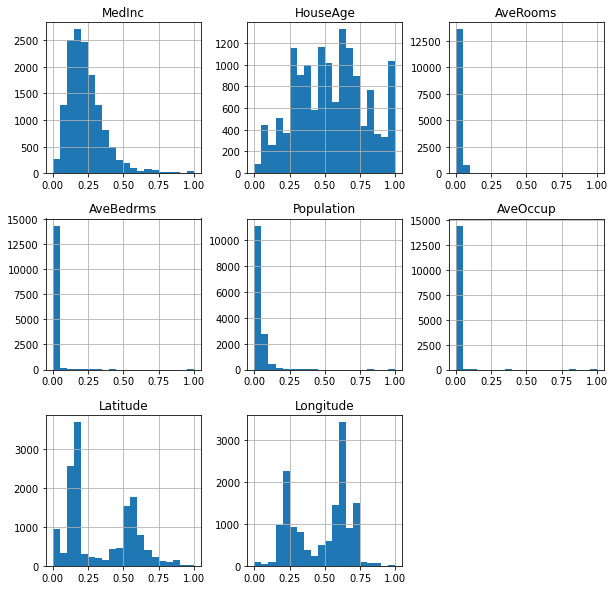

In [11]:
# Distribution after scaling:

X_train_scaled.hist(bins=20, figsize=(10,10))
plt.show()

The minimum and maximum values are different, but the shape of the distribution is similar.